In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
x_train = train.drop(columns = ["median_house_value"])
y_train = train["median_house_value"]

In [ ]:
test = pd.read_csv("/content/sample_data/california_housing_test.csv")
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
x_test = test.drop(columns = ["median_house_value"])
y_test = test["median_house_value"]

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17000, 8), (3000, 8), (17000,), (3000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
 
sc=StandardScaler()
 
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.fit_transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
 
model=Sequential()
 
model.add(Dense(25, input_dim = 8, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "linear"))
#model.compile(loss = "mean_absolute_error", optimizer = SGD(momentum = 0.6), metrics = ["mse"])
model.compile(loss = "mean_squared_logarithmic_error", optimizer = SGD(momentum = 0.6), metrics = ["mse"])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                225       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [ ]:
help(SGD)

Help on class SGD in module tensorflow.python.keras.optimizer_v2.gradient_descent:

class SGD(tensorflow.python.keras.optimizer_v2.optimizer_v2.OptimizerV2)
 |  SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs)
 |  
 |  Gradient descent (with momentum) optimizer.
 |  
 |  Update rule for parameter `w` with gradient `g` when `momentum` is 0:
 |  
 |  ```python
 |  w = w - learning_rate * g
 |  ```
 |  
 |  Update rule when `momentum` is larger than 0:
 |  
 |  ```python
 |  velocity = momentum * velocity - learning_rate * g
 |  w = w + velocity
 |  ```
 |  
 |  When `nesterov=True`, this rule becomes:
 |  
 |  ```python
 |  velocity = momentum * velocity - learning_rate * g
 |  w = w + momentum * velocity - learning_rate * g
 |  ```
 |  
 |  Args:
 |    learning_rate: A `Tensor`, floating point value, or a schedule that is a
 |      `tf.keras.optimizers.schedules.LearningRateSchedule`, or a callable
 |      that takes no arguments and returns the actual value t

In [ ]:
history = model.fit(sc_x_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
340/340 [==============================] - 1s 1ms/step - loss: 52.9509 - mse: 56381600452.6921
Epoch 2/100
340/340 [==============================] - 0s 1ms/step - loss: 17.2834 - mse: 54901738414.9208
Epoch 3/100
340/340 [==============================] - 0s 1ms/step - loss: 12.0203 - mse: 54193314806.9912
Epoch 4/100
340/340 [==============================] - 0s 1ms/step - loss: 9.2641 - mse: 52182354394.4633
Epoch 5/100
340/340 [==============================] - 0s 1ms/step - loss: 7.6392 - mse: 51829555091.8944
Epoch 6/100
340/340 [==============================] - 0s 1ms/step - loss: 6.4406 - mse: 50271232612.5982
Epoch 7/100
340/340 [==============================] - 0s 1ms/step - loss: 5.6128 - mse: 49842681681.8299
Epoch 8/100
340/340 [==============================] - 0s 1ms/step - loss: 4.9032 - mse: 47970010024.9150
Epoch 9/100
340/340 [==============================] - 0s 1ms/step - loss: 4.3543 - mse: 46973662397.1848
Epoch 10/100
340/340 [=====================

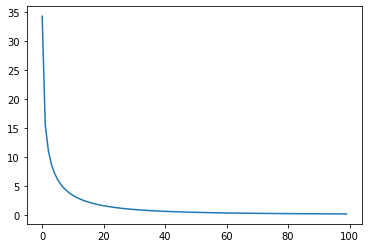

In [ ]:
plt.plot(history.history["loss"])
plt.show()

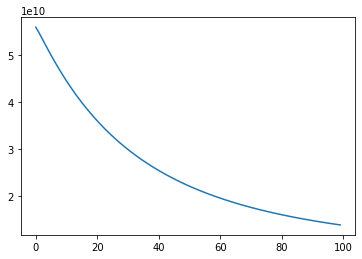

In [ ]:
plt.plot(history.history["mse"])
plt.show()

In [ ]:
y_pred = model.predict(sc_x_test)

In [ ]:
y_pred.flatten()

array([172253.38, 149794.17, 172426.61, ..., 114042.66, 151968.03,
       217115.62], dtype=float32)

In [ ]:
pd.DataFrame({"Actual Value" : y_test, "Predicted" : y_pred.flatten()})

,Actual Value,Predicted
0,344700.0,172253.375000
1,176500.0,149794.171875
2,270500.0,172426.609375
3,330000.0,185599.906250
4,81700.0,124601.320312
...,...,...
2995,225000.0,108954.273438
2996,237200.0,138296.890625
2997,62000.0,114042.656250
2998,162500.0,151968.031250
